# 特征点识别

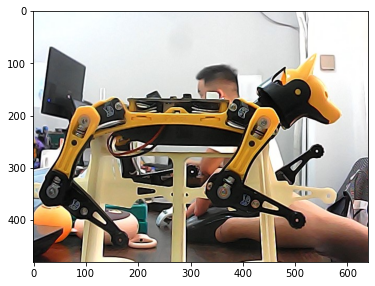

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
data_path = "C:/Users/Asus.000/Pictures/Camera Roll/picture/"

image = cv.imread(data_path + "6.jpg")
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

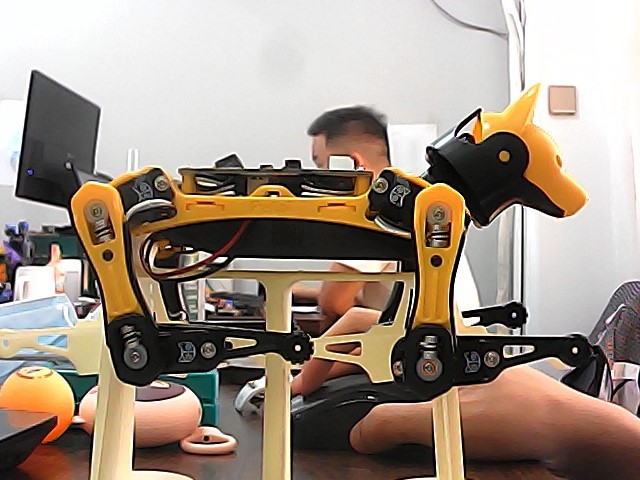

In [2]:
Image(filename=data_path + "2.jpg") 

## 模板匹配方法

In [3]:
dog = cv.imread(r'C:\Users\Asus.000\Pictures\Camera Roll\test.jpg')
template = cv.imread(r'C:\Users\Asus.000\Pictures\Camera Roll\template.png',0)

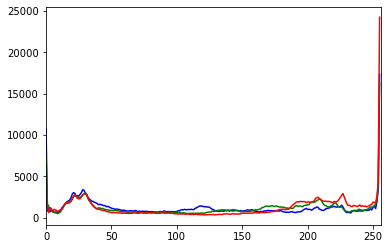

In [4]:
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv.calcHist([dog],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.show()


In [5]:
graydog = cv.cvtColor(dog, cv.COLOR_BGR2GRAY)


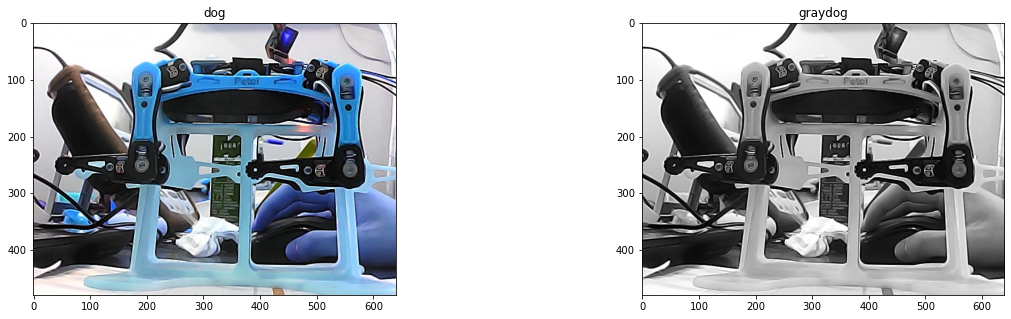

In [6]:
plt.figure(figsize=[20,5])
#dog = dog[:, :, ::-1]
plt.subplot(121);plt.imshow(dog);plt.title("dog");
plt.subplot(122);plt.imshow(graydog,cmap='gray');plt.title("graydog");

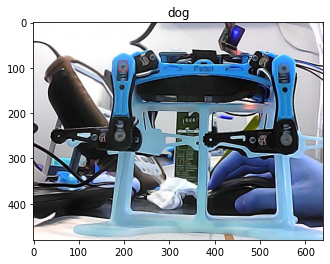

In [7]:
w, h = template.shape[::-1]
res = cv.matchTemplate(graydog,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
# 保留满足条件的坐标
loc = np.where(res >= threshold)
# 解压缩
for pt in zip(*loc[::-1]):
    cv.rectangle(dog, pt, (pt[0] + w, pt[1] + h), (255,0,0), 1)
(minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(res)
plt.imshow(dog);plt.title("dog");

## 霍夫圆检测

In [8]:
def scan_params(imname="2", dp = 1.1, param1_bounds=(70,130), param2_bounds=(15,30),minDist=110, minRadius=8, maxRadius=20,method=cv.HOUGH_GRADIENT,):
    num_y, num_x = 4, 6  # Panel subplot dimensions

    param1s, params2 = np.meshgrid(np.linspace(param1_bounds[0], param1_bounds[1], num=num_x), 
                                   np.linspace(param2_bounds[0], param2_bounds[1], num=num_y))  # Param1 and param2 values on a grid

    # Create panel plotting object
    fig, axs = plt.subplots(nrows=num_y, ncols=num_x, figsize=(12, 7), sharex=True, sharey=True)

    # Read in image and convert to grayscale
    impath = data_path + imname + ".jpg"
    image = cv.imread(impath)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
#    hist = cv.equalizeHist(gray)

#    blur = cv.GaussianBlur(gray, (31,31), cv.BORDER_DEFAULT)
    # For each possible pair of parameter values, apply circle detection and plot the results
    for index, ax in np.ndenumerate(axs):
        y, x = index
            
        param1, param2 = param1s[y, x], params2[y, x]
        
        # Set subplot labels for param1, param2 values (only on border subplots)
        if x==0:
            ax.set_ylabel("param2=%.0f" % (param2,))
        if y==num_y-1:
            ax.set_xlabel("param1=%.0f" % (param1,))
            
        # Set figure title with dp value
        fig.suptitle("Parameter dp=%.1f" % (dp,), fontsize=20, y=0.95)
            
        # Turn off ticks/ticklabels
        ax.set_xticks([])
        ax.set_yticks([])
            
        # Detect proposed circles
        circles_proposed = cv.HoughCircles(image=gray, method=method, dp=dp, minDist=minDist, param1=param1, param2=param2, 
                                   minRadius=minRadius, maxRadius=maxRadius)

        # Eliminate any false circles found on the gray tray background, and plot valid circles
        output = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # opencv defaults to BGR channel config, pyplot expects RGB
        if circles_proposed is not None:

            circles_proposed = np.round(circles_proposed[0, :]).astype("int")  # round center coordinates and radius to integer pixels

            # Draw valid circles with their centerpoints onto the original image
            for (x, y, r) in circles_proposed:
                circ_color, rsize = (255, 0, 0), 10  # set plotting parameters
                cv.circle(output, (x, y), r, circ_color, 4)  # draw the circle
                cv.rectangle(output, (x - rsize, y - rsize), (x + rsize, y + rsize), circ_color, -1)  # draw a small rectangle at the center
        ax.imshow(output)

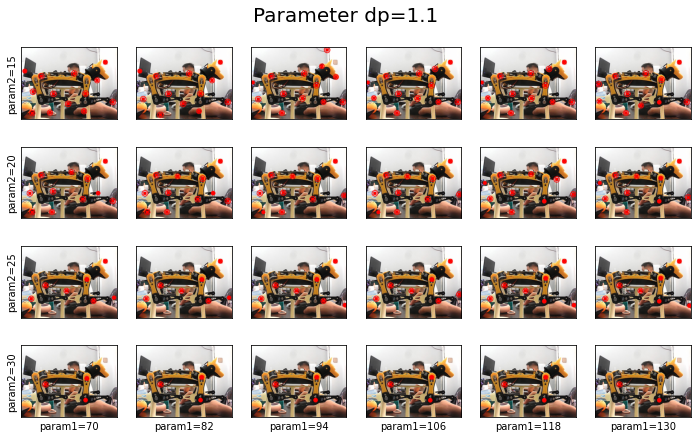

In [9]:
scan_params(imname="2")


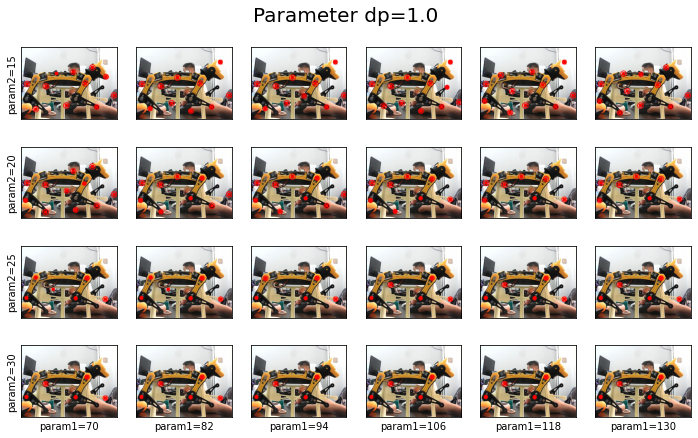

In [10]:
scan_params(imname="6", dp=1)

In [11]:
def iterate_panel(method=cv.HOUGH_GRADIENT, dp=1.1, minDist=120, param1=90, param2=25, minRadius=8, maxRadius=20):
    
    # Create panel plotting object
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 4))
    axs = axs.ravel()
    fig.suptitle("Detection Results on Example Images", fontsize=20, y=0.95)
    
    # For each image, apply circle detection and plot the results
    for i, ax in enumerate(axs[:-1]):
        impath = data_path + str(i+2) + ".jpg"
        print(impath)
        image = cv.imread(impath)
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

        # Detect proposed circles
        circles_proposed = cv.HoughCircles(image=gray, method=method, dp=dp, minDist=minDist, param1=param1, param2=param2, 
                                   minRadius=minRadius, maxRadius=maxRadius)
        
        # Create a mask representing pixels belong to the gray tray background
#        gray_lower, gray_upper = np.array([0, 0, 0]), np.array([250, 250, 250])  # The range of colors for the gray tray
#        masked = cv.bitwise_and(gray, gray, mask=cv.inRange(image, gray_lower, gray_upper))

        # Eliminate any false circles found on the gray tray background, and plot valid circles
        output = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # opencv defaults to BGR channel config, pyplot expects RGB
        if circles_proposed is not None:
            
            circles_proposed = np.round(circles_proposed[0, :]).astype("int")  # round center coordinates and radius to integer pixels
            
            # Eliminate any false circles from the gray tray
            circles = []
            for (x, y, r) in circles_proposed:
#                if masked[y, x] == 0:
                circles.append((x, y, r))
            
            # Draw valid circles with their centerpoints onto the original image
            for (x, y, r) in circles:
                circ_color, rsize = (255, 0, 0), 10  # set plotting parameters
                cv.circle(output, (x, y), r, circ_color, 4)  # draw the circle
                cv.rectangle(output, (x - rsize, y - rsize), (x + rsize, y + rsize), circ_color, -1)  # draw a small rectangle at the center
                
        ax.imshow(output)
        
    # Turn off ticks/ticklabels
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

C:/Users/Asus.000/Pictures/Camera Roll/picture/2.jpg
C:/Users/Asus.000/Pictures/Camera Roll/picture/3.jpg
C:/Users/Asus.000/Pictures/Camera Roll/picture/4.jpg
C:/Users/Asus.000/Pictures/Camera Roll/picture/5.jpg
C:/Users/Asus.000/Pictures/Camera Roll/picture/6.jpg
C:/Users/Asus.000/Pictures/Camera Roll/picture/7.jpg
C:/Users/Asus.000/Pictures/Camera Roll/picture/8.jpg


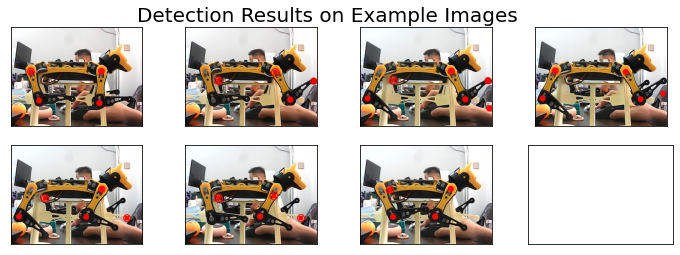

In [12]:
iterate_panel(method=cv.HOUGH_GRADIENT, dp=1, minDist=110, param1=130, param2=25, 
              minRadius=8, maxRadius=20)

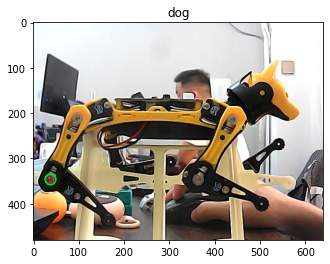

In [13]:
#Roi = dog[0:300,0:300]
grayimg = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
circles = cv.HoughCircles(grayimg,cv.HOUGH_GRADIENT,1,120,
                            param1=180,param2=30,minRadius=8,maxRadius=20)
circles = np.uint16(np.around(circles)) #np.around四舍五入取值
for i in circles[0,:]:
    # 画外圈
    cv.circle(image,(i[0],i[1]),i[2],(0,255,0),2)
    # 画圆心
    cv.circle(image,(i[0],i[1]),2,(0,0,255),3)
image = image[:, :, ::-1]
#Roi = Roi[:, :, ::-1]
plt.imshow(image);plt.title("dog");

In [14]:
circles

array([[[ 38, 346,  12]]], dtype=uint16)

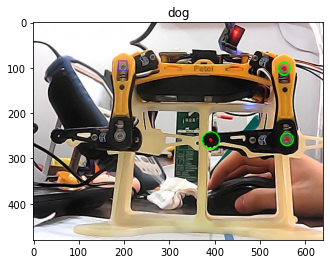

In [15]:
circles = cv.HoughCircles(graydog,cv.HOUGH_GRADIENT,1,100,
                            param1=10,param2=40,minRadius=5,maxRadius=20)
circles = np.uint16(np.around(circles)) #np.around四舍五入取值
for i in circles[0,:]:
    # 画外圈
    cv.circle(dog,(i[0],i[1]),i[2],(0,255,0),2)
    # 画圆心
    cv.circle(dog,(i[0],i[1]),2,(0,0,255),3)
dog = dog[:, :, ::-1]
plt.imshow(dog);plt.title("dog");

In [16]:
circles

array([[[392, 260,  19],
        [554, 102,  14],
        [560, 258,  14]]], dtype=uint16)

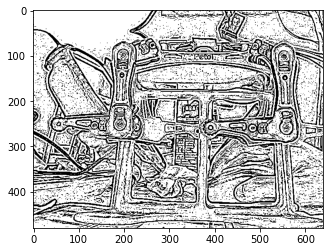

In [17]:
th1 = cv.adaptiveThreshold(graydog,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
plt.imshow(th1,'gray')

# 特征匹配
我们将了解如何将一个图像中的要素与其他图像中的要素进行匹配 

我们将在 OpenCV 中使用Brute-Force匹配器和 FLANN 匹配器


In [18]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread(r'C:\Users\Asus.000\Pictures\Camera Roll\test.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread(r'C:\Users\Asus.000\Pictures\Camera Roll\test.png',cv.IMREAD_GRAYSCALE) # trainImage
img1 = img1[0:300,0:300]
orb = cv.ORB_create()
# 使用 ORB 查找关键点和描述符
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


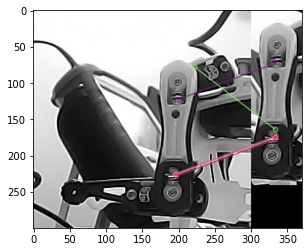

(<matplotlib.image.AxesImage at 0x1cffde27828>, None)

In [19]:
# 创建 BFMatcher 对象，使用距离测量 cv.NORM_HAMMING（因为我们使用 ORB），
# 并打开 crossCheck 以获得更好的结果。
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# 匹配描述符
matches = bf.match(des1,des2)
# 按照距离的顺序对它们进行排序
matches = sorted(matches, key = lambda x:x.distance)
# 描绘10个最佳匹配，不画出单个点
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:5],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3),plt.show()


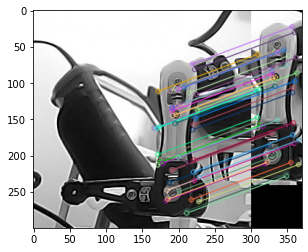

(<matplotlib.image.AxesImage at 0x1cfff386198>, None)

In [20]:
sift = cv.SIFT_create()
# 使用 SIFT 找到关键点和描述符
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# 具有默认参数的 BFMatcher
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2) #k = 2为论文给出的比较好的默认值
# 应用比率筛选
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])

# cv.drawMatchesKnn 期望列表列表作为匹配项
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3),plt.show()


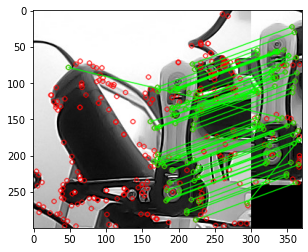

(<matplotlib.image.AxesImage at 0x1cfff2b9048>, None)

In [21]:
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN 参数
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# 递归遍历索引中的树的次数。值越高，精度越高，但也需要更多时间
search_params = dict(checks=50)  
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# 只需要绘制好的匹配，所以创建一个对象
matchesMask = [[0,0] for i in range(len(matches))]

for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()


In [22]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv.imread(r'C:\Users\Asus.000\Pictures\Camera Roll\test.jpg',0)          # queryImage
img2 = cv.imread(r'C:\Users\Asus.000\Pictures\Camera Roll\test1.png',0) # trainImage
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)


In [23]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    # 可能会有错误的匹配，使用ransac算法进行过滤
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist() # tolist()将数组或者矩阵转换成列表
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None


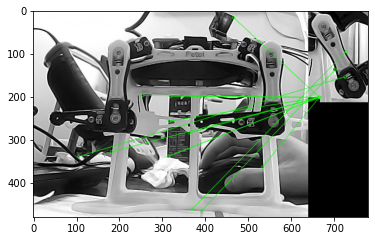

(<matplotlib.image.AxesImage at 0x1cfffc61208>, None)

In [24]:
draw_params = dict(matchColor = (0,255,0), # 用绿色画匹配
                   singlePointColor = None,
                   matchesMask = matchesMask, # 仅绘制内点
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()
